## Read and Parse Data

                       price
datetime                    
2017-12-09 15:25:00  15078.2
2017-12-09 15:26:00  15078.2
2017-12-09 15:26:00  15078.2
2017-12-09 15:26:00  15078.2
2017-12-09 15:26:00  15078.2


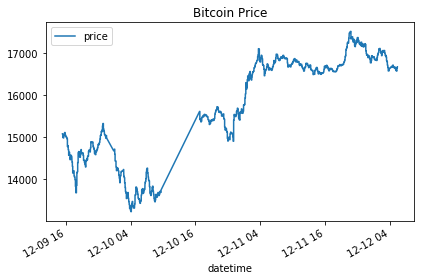

In [170]:
# bitcoin_series = read_csv('live_bitcoin.csv', header=None, usecols=[0, 11])
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('20'+x, '%Y-%m-%d-%H-%M')
 
# read and parse data 
bitcoin_series = read_csv('live_bitcoin.csv', header=None, parse_dates=[11], squeeze=True, date_parser=parser)
bitcoin_series = bitcoin_series.iloc[:, [11, 0]]
bitcoin_series.columns = ['datetime', 'price']

# set index as datetime to support plotting and Arima Model
bitcoin_series.set_index('datetime', inplace=True)
# bitcoin_series = bitcoin_series.asfreq('T')

print(bitcoin_series.head())

bitcoin_series.plot(title='Bitcoin Price')
pyplot.tight_layout()
pyplot.show()

In [176]:
bitcoin_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12648 entries, 2017-12-09 15:25:00 to 2017-12-12 05:20:00
Data columns (total 1 columns):
price    12648 non-null float64
dtypes: float64(1)
memory usage: 517.6 KB


## Statistics 

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                12647
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -57559.434
Method:                       css-mle   S.D. of innovations             22.927
Date:                Tue, 12 Dec 2017   AIC                         115132.868
Time:                        20:22:17   BIC                         115184.985
Sample:                    12-09-2017   HQIC                        115150.305
                         - 12-12-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1261      0.206      0.612      0.541      -0.278       0.530
ar.L1.D.price     0.0115      0.009      1.288      0.198      -0.006       0.029
ar.L2.D.price    -0.0032      0.009     

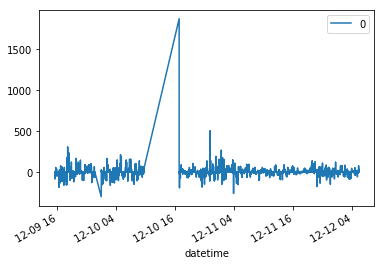

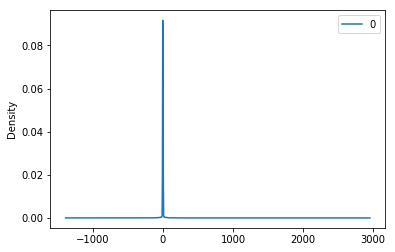

                  0
count  12647.000000
mean      -0.000003
std       22.927412
min     -303.124780
25%       -0.124780
50%       -0.124780
75%       -0.124780
max     1867.531693


In [150]:
from statsmodels.tsa.arima_model import ARIMA 

model = ARIMA(bitcoin_series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Autocorrelation

/anaconda/envs/bigdataTS/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


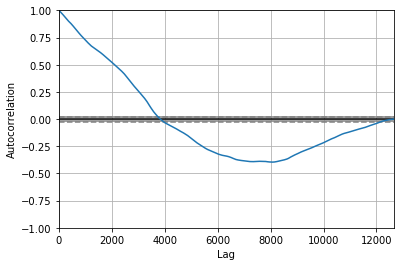

In [164]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(bitcoin_series)
pyplot.show()

In [165]:
from tqdm import tqdm

# for i in tqdm(range(10000)):
X = bitcoin_series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print('Total Test cases: {}'.format(len(test)))
for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

  0%|          | 1/4301 [00:00<08:25,  8.50it/s]

Total Test cases: 4301


 74%|███████▎  | 3170/4301 [06:59<02:29,  7.56it/s]

KeyboardInterrupt: 

Test MSE: 104.142


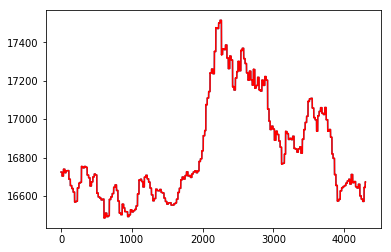

In [161]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()